<a href="https://colab.research.google.com/github/PraneelUJ/CS203_Lab_6/blob/main/stt_lab6_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autogluon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split into train and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def build_model(input_shape, num_classes, learning_rate):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(input_shape,)),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def train_and_evaluate(batch_sizes, learning_rates, epochs):
    results = []
    confusion_matrices = {}
    loss_logs = {}

    iris = load_iris()
    X = iris.data
    y = to_categorical(iris.target, num_classes=3)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    input_shape = X_train.shape[1]

    for batch_size in batch_sizes:
        for lr in learning_rates:
            for epoch in epochs:
                print(f"\nTraining with batch_size={batch_size}, learning_rate={lr}, epochs={epoch}")

                model = build_model(input_shape, num_classes=3, learning_rate=lr)

                history = model.fit(X_train, y_train,
                                    validation_data=(X_test, y_test),
                                    epochs=epoch,
                                    batch_size=batch_size,
                                    verbose=2)

                # Evaluate on test data
                y_pred_prob = model.predict(X_test)
                y_pred = np.argmax(y_pred_prob, axis=1)
                y_true = np.argmax(y_test, axis=1)
                acc = accuracy_score(y_true, y_pred)
                f1 = f1_score(y_true, y_pred, average='weighted')

                results.append({
                    'batch_size': batch_size,
                    'learning_rate': lr,
                    'epochs': epoch,
                    'accuracy': acc,
                    'f1_score': f1
                })

                print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

                # Store confusion matrix
                cm = confusion_matrix(y_true, y_pred)
                confusion_matrices[f"bs{batch_size}_lr{lr}_ep{epoch}"] = cm

                # Store loss logs
                loss_logs[f"bs{batch_size}_lr{lr}_ep{epoch}"] = {
                    'train_loss': history.history['loss'],
                    'val_loss': history.history['val_loss']
                }

    return pd.DataFrame(results), confusion_matrices, loss_logs

# Define hyperparameter values
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs = [1, 3, 5]

# Train and evaluate
results_df, confusion_matrices, loss_logs = train_and_evaluate(batch_sizes, learning_rates, epochs)

print("\nFinal Results:")
print(results_df)




Training with batch_size=2, learning_rate=0.001, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 2s - 25ms/step - accuracy: 0.2167 - loss: 1.1959 - val_accuracy: 0.2667 - val_loss: 1.0442
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Accuracy: 0.2667, F1 Score: 0.1956

Training with batch_size=2, learning_rate=0.001, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 2s - 25ms/step - accuracy: 0.4667 - loss: 1.0142 - val_accuracy: 0.5333 - val_loss: 0.8883
Epoch 2/3
60/60 - 1s - 10ms/step - accuracy: 0.6083 - loss: 0.7963 - val_accuracy: 0.7000 - val_loss: 0.7051
Epoch 3/3
60/60 - 1s - 15ms/step - accuracy: 0.6583 - loss: 0.6484 - val_accuracy: 0.7333 - val_loss: 0.5774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Accuracy: 0.7333, F1 Score: 0.6622

Training with batch_size=2, learning_rate=0.001, epochs=5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
60/60 - 5s - 89ms/step - accuracy: 0.2500 - loss: 1.1855 - val_accuracy: 0.4333 - val_loss: 1.0432
Epoch 2/5
60/60 - 1s - 17ms/step - accuracy: 0.5917 - loss: 0.9374 - val_accuracy: 0.6667 - val_loss: 0.8216
Epoch 3/5
60/60 - 1s - 17ms/step - accuracy: 0.7667 - loss: 0.7641 - val_accuracy: 0.8333 - val_loss: 0.6722
Epoch 4/5
60/60 - 1s - 22ms/step - accuracy: 0.7917 - loss: 0.6477 - val_accuracy: 0.8333 - val_loss: 0.5700
Epoch 5/5
60/60 - 2s - 25ms/step - accuracy: 0.8083 - loss: 0.5705 - val_accuracy: 0.8333 - val_loss: 0.4955
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Accuracy: 0.8333, F1 Score: 0.8167

Training with batch_size=2, learning_rate=1e-05, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 2s - 42ms/step - accuracy: 0.2667 - loss: 1.4108 - val_accuracy: 0.2667 - val_loss: 1.5261
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Accuracy: 0.2667, F1 Score: 0.1811

Training with batch_size=2, learning_rate=1e-05, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 4s - 59ms/step - accuracy: 0.3417 - loss: 1.1368 - val_accuracy: 0.3667 - val_loss: 1.1081
Epoch 2/3
60/60 - 1s - 11ms/step - accuracy: 0.3417 - loss: 1.1339 - val_accuracy: 0.4000 - val_loss: 1.1052
Epoch 3/3
60/60 - 1s - 15ms/step - accuracy: 0.3417 - loss: 1.1310 - val_accuracy: 0.4000 - val_loss: 1.1021
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Accuracy: 0.4000, F1 Score: 0.3267

Training with batch_size=2, learning_rate=1e-05, epochs=5
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 - 1s - 24ms/step - accuracy: 0.2083 - loss: 1.2281 - val_accuracy: 0.1333 - val_loss: 1.2398
Epoch 2/5
60/60 - 0s - 4ms/step - accuracy: 0.2083 - loss: 1.2253 - val_accuracy: 0.1667 - val_loss: 1.2368
Epoch 3/5
60/60 - 0s - 4ms/step - accuracy: 0.2250 - loss: 1.2226 - val_accuracy: 0.1667 - val_loss: 1.2336
Epoch 4/5
60/60 - 0s - 4ms/step - accuracy: 0.2250 - loss: 1.2198 - val_accuracy: 0.1667 - val_loss: 1.2306
Epoch 5/5
60/60 - 0s - 5ms/step - accuracy: 0.2250 - loss: 1.2171 - val_accuracy: 0.1667 - val_loss: 1.2276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Accuracy: 0.1667, F1 Score: 0.1314

Training with batch_size=4, learning_rate=0.001, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 1s - 47ms/step - accuracy: 0.3000 - loss: 1.4179 - val_accuracy: 0.2333 - val_loss: 1.3322
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Accuracy: 0.2333, F1 Score: 0.1200

Training with batch_size=4, learning_rate=0.001, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 1s - 47ms/step - accuracy: 0.3000 - loss: 1.3135 - val_accuracy: 0.3667 - val_loss: 1.2106
Epoch 2/3
30/30 - 0s - 13ms/step - accuracy: 0.4417 - loss: 1.1328 - val_accuracy: 0.4333 - val_loss: 1.0341
Epoch 3/3
30/30 - 0s - 11ms/step - accuracy: 0.4917 - loss: 0.9943 - val_accuracy: 0.4667 - val_loss: 0.9033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Accuracy: 0.4667, F1 Score: 0.4049

Training with batch_size=4, learning_rate=0.001, epochs=5
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 1s - 48ms/step - accuracy: 0.6833 - loss: 0.8443 - val_accuracy: 0.7000 - val_loss: 0.7674
Epoch 2/5
30/30 - 1s - 17ms/step - accuracy: 0.6917 - loss: 0.7293 - val_accuracy: 0.6667 - val_loss: 0.6699
Epoch 3/5
30/30 - 0s - 10ms/step - accuracy: 0.6833 - loss: 0.6479 - val_accuracy: 0.7333 - val_loss: 0.5912
Epoch 4/5
30/30 - 0s - 12ms/step - accuracy: 0.7250 - loss: 0.5845 - val_accuracy: 0.8333 - val_loss: 0.5303
Epoch 5/5
30/30 - 1s - 24ms/step - accuracy: 0.7583 - loss: 0.5347 - val_accuracy: 0.8333 - val_loss: 0.4818
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Accuracy: 0.8333, F1 Score: 0.8167

Training with batch_size=4, learning_rate=1e-05, epochs=1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 3s - 114ms/step - accuracy: 0.0167 - loss: 1.3560 - val_accuracy: 0.0333 - val_loss: 1.3912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Accuracy: 0.0333, F1 Score: 0.0600

Training with batch_size=4, learning_rate=1e-05, epochs=3
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 3s - 116ms/step - accuracy: 0.8000 - loss: 0.8267 - val_accuracy: 0.9000 - val_loss: 0.7634
Epoch 2/3
30/30 - 0s - 6ms/step - accuracy: 0.8000 - loss: 0.8252 - val_accuracy: 0.9000 - val_loss: 0.7619
Epoch 3/3
30/30 - 0s - 7ms/step - accuracy: 0.8000 - loss: 0.8238 - val_accuracy: 0.9000 - val_loss: 0.7604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Accuracy: 0.9000, F1 Score: 0.8992

Training with batch_size=4, learning_rate=1e-05, epochs=5
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 - 1s - 48ms/step - accuracy: 0.4000 - loss: 1.2726 - val_accuracy: 0.4333 - val_loss: 1.2636
Epoch 2/5
30/30 - 0s - 13ms/step - accuracy: 0.4000 - loss: 1.2702 - val_accuracy: 0.4333 - val_loss: 1.2611
Epoch 3/5
30/30 - 0s - 7ms/step - accuracy: 0.4000 - loss: 1.2678 - val_accuracy: 0.4333 - val_loss: 1.2588
Epoch 4/5
30/30 - 0s - 10ms/step - accuracy: 0.4000 - loss: 1.2655 - val_accuracy: 0.4333 - val_loss: 1.2563
Epoch 5/5
30/30 - 0s - 6ms/step - accuracy: 0.4000 - loss: 1.2632 - val_accuracy: 0.4333 - val_loss: 1.2539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Accuracy: 0.4333, F1 Score: 0.3353

Final Results:
    batch_size  learning_rate  epochs  accuracy  f1_score
0            2        0.00100       1  0.266667  0.195556
1            2        0.00100       3  0.733333  0.662222
2            2        0.00100       5  0.833333  0.816714
3            2        0.00001       1  0.266667  0.181127
4            2        0.00001       3  0.400000  0.326667
5            2        0.00001 

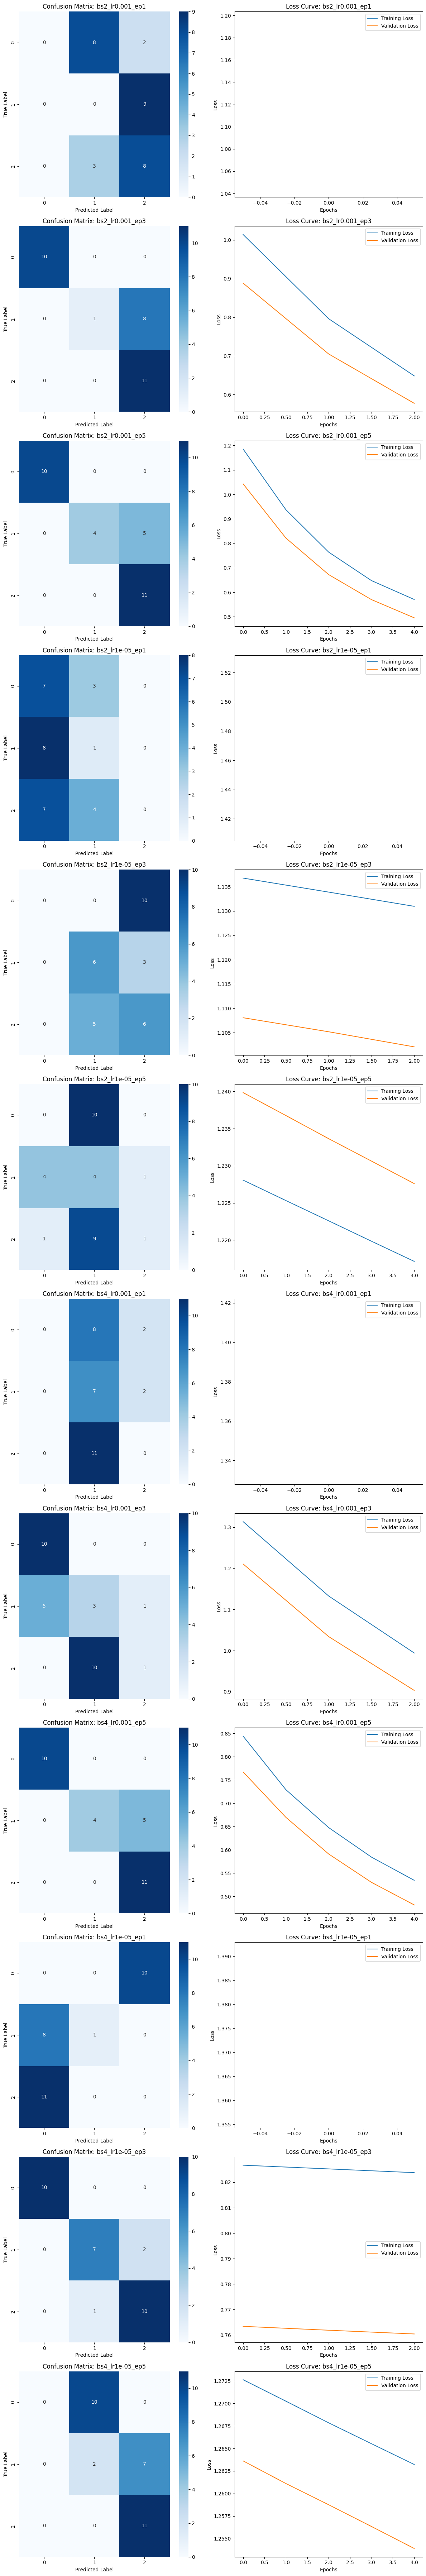

In [41]:
num_experiments = len(confusion_matrices)
fig, axes = plt.subplots(num_experiments, 2, figsize=(12, 6 * num_experiments))

for i, (key, cm) in enumerate(confusion_matrices.items()):
    ax1 = axes[i, 0]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.set_title(f'Confusion Matrix: {key}')

    ax2 = axes[i, 1]
    losses = loss_logs[key]
    ax2.plot(losses['train_loss'], label='Training Loss')
    ax2.plot(losses['val_loss'], label='Validation Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title(f'Loss Curve: {key}')
    ax2.legend()

plt.tight_layout()
plt.show()


In [5]:
grid_models

{'auto_mlp_bs2_lr0.001_ep1': (2, 0.001, 1),
 'auto_mlp_bs2_lr0.001_ep3': (2, 0.001, 3),
 'auto_mlp_bs2_lr0.001_ep5': (2, 0.001, 5),
 'auto_mlp_bs2_lr1e-05_ep1': (2, 1e-05, 1),
 'auto_mlp_bs2_lr1e-05_ep3': (2, 1e-05, 3),
 'auto_mlp_bs2_lr1e-05_ep5': (2, 1e-05, 5),
 'auto_mlp_bs4_lr0.001_ep1': (4, 0.001, 1),
 'auto_mlp_bs4_lr0.001_ep3': (4, 0.001, 3),
 'auto_mlp_bs4_lr0.001_ep5': (4, 0.001, 5),
 'auto_mlp_bs4_lr1e-05_ep1': (4, 1e-05, 1),
 'auto_mlp_bs4_lr1e-05_ep3': (4, 1e-05, 3),
 'auto_mlp_bs4_lr1e-05_ep5': (4, 1e-05, 5)}

In [6]:
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.common as agco

In [7]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.Series(data['target'], name="target")

targets = column_name=data['feature_names'].copy()
targets.append(['target'])
df = pd.concat([df, target.to_frame()], axis=1)

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data.to_csv("train.csv", index=False)
test_data.to_csv("test.csv", index=False)

train_data = TabularDataset("train.csv")
test_data = TabularDataset("test.csv")

Loaded data from: train.csv | Columns = 5 / 5 | Rows = 120 -> 120
Loaded data from: test.csv | Columns = 5 / 5 | Rows = 30 -> 30


In [8]:
predictor = TabularPredictor(
    label='target',
    eval_metric='accuracy',
    path='models/random_model',
    verbosity=2,
    problem_type='multiclass'
)

hyperparameter_tune_kwargs = {
  'num_trials': 10,
  'scheduler': 'local',
  'searcher': 'random',
}

predictor.fit(
    train_data,
    hyperparameters={'NN_TORCH': {
        'num_epochs': agco.space.Categorical(1,3,5),
        'learning_rate': agco.space.Categorical(1e-3,1e-5),
        'batch_size': agco.space.Categorical(2, 4),
        'activation': 'relu',
        'optimizer': 'adam',
        'hidden_size': 16,
        'num_layers': 1
    }},
    time_limit=600,
    verbosity=2,
    presets='medium_quality_faster_train',
    raise_on_no_models_fitted=True,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)



Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.86 GB / 12.67 GB (85.7%)
Disk Space Avail:   71.19 GB / 107.72 GB (66.1%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/random_model"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11119.86 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferr

+--------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch        |
+--------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator |
| Scheduler                        FIFOScheduler         |
| Number of trials                 10                    |
+--------------------------------------------------------+

View detailed results here: /content/models/random_model/models/NeuralNetTorch


Fitted model: NeuralNetTorch/6d12a_00000 ...
	0.625	 = Validation score   (accuracy)
	8.22s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/6d12a_00001 ...
	0.7083	 = Validation score   (accuracy)
	9.65s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch/6d12a_00002 ...
	0.7083	 = Validation score   (accuracy)
	8.04s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/6d12a_00003 ...
	0.1667	 = Validation score   (accuracy)
	7.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/6d12a_00004 ...
	0.5833	 = Validation score   (accuracy)
	6.33s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/6d12a_00005 ...
	0.75	 = Validation score   (accuracy)
	6.44s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/6d12a_00006 ...
	0.4167	 = Validation score   (accuracy)
	13.29s	 = Training   runtime
	0.08s	 = Validation ru

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 490.77s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/6d12a_00005': 1.0}
	0.75	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 109.27s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 3025.9 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/random_model")


In [10]:
import os
import pickle

random_models = {}
for i in range(10):
    for file in os.listdir(f'/content/models/random_model/models/NeuralNetTorch/6d12a_0000{i}'):
        with open(os.path.join(f'/content/models/random_model/models/NeuralNetTorch/6d12a_0000{i}', file), 'rb') as f:
            model_pkl = pickle.load(f)
            random_models[f'6d12a_0000{i}'] = (model_pkl.params['batch_size'], model_pkl.params['learning_rate'], model_pkl.params['num_epochs'])
#

In [11]:
random_models

{'6d12a_00000': (2, 0.001, 1),
 '6d12a_00001': (2, 0.001, 5),
 '6d12a_00002': (4, 0.001, 5),
 '6d12a_00003': (2, 1e-05, 3),
 '6d12a_00004': (2, 0.001, 3),
 '6d12a_00005': (2, 0.001, 3),
 '6d12a_00006': (4, 0.001, 1),
 '6d12a_00007': (2, 1e-05, 1),
 '6d12a_00008': (4, 1e-05, 1),
 '6d12a_00009': (4, 1e-05, 3)}

In [12]:
# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)

Test Accuracy: 0.6667
Test F1: 0.5615


In [13]:
config_table = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        # Since we can't directly access hyperparameters, we'll extract what we can from model name
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')

        # Create entry with available information
        config_table.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1,
            'learning_rate': random_models[model_row['model'].split('/')[1]][1],
            'epochs': random_models[model_row['model'].split('/')[1]][2],
            'batch_size': random_models[model_row['model'].split('/')[1]][0]
        })

# Display the configuration table
config_df = pd.DataFrame(config_table)
print("\nConfiguration Performance Table:")
print(config_df[['Model', 'Accuracy', 'F1', 'learning_rate', 'epochs', 'batch_size']])


Configuration Performance Table:
                        Model  Accuracy        F1  learning_rate  epochs  \
0  NeuralNetTorch/6d12a_00004  0.733333  0.727946        0.00100       3   
1  NeuralNetTorch/6d12a_00002  0.700000  0.581191        0.00100       5   
2  NeuralNetTorch/6d12a_00001  0.666667  0.564935        0.00100       5   
3  NeuralNetTorch/6d12a_00005  0.666667  0.561460        0.00100       3   
4  NeuralNetTorch/6d12a_00000  0.600000  0.515556        0.00100       1   
5  NeuralNetTorch/6d12a_00006  0.400000  0.316410        0.00100       1   
6  NeuralNetTorch/6d12a_00003  0.200000  0.185714        0.00001       3   
7  NeuralNetTorch/6d12a_00008  0.033333  0.040000        0.00001       1   
8  NeuralNetTorch/6d12a_00007  0.000000  0.000000        0.00001       1   
9  NeuralNetTorch/6d12a_00009  0.000000  0.000000        0.00001       3   

   batch_size  
0           2  
1           4  
2           2  
3           2  
4           2  
5           4  
6           2  
7

In [14]:
config_df = config_df.drop(columns=['Model'])
config_df

,Accuracy,F1,learning_rate,epochs,batch_size
0,0.733333,0.727946,0.00100,3,2
1,0.700000,0.581191,0.00100,5,4
2,0.666667,0.564935,0.00100,5,2
3,0.666667,0.561460,0.00100,3,2
4,0.600000,0.515556,0.00100,1,2
5,0.400000,0.316410,0.00100,1,4
6,0.200000,0.185714,0.00001,3,2
7,0.033333,0.040000,0.00001,1,4
8,0.000000,0.000000,0.00001,1,2
9,0.000000,0.000000,0.00001,3,4


In [15]:
# Define hyperparameter tuning
hyperparameter_tune_kwargs = {
    'num_trials': 10,
    'scheduler': 'local',
    'searcher': 'bayes',
}

# Define hyperparameter search space
hyperparams = {
    'NN_TORCH': {
        'num_epochs': agco.space.Categorical(1, 3, 5),
        'learning_rate': agco.space.Categorical(1e-3, 1e-5),
        'batch_size': agco.space.Categorical(2, 4),
        'activation': 'relu',
        'optimizer': 'adam',
        'hidden_size': 16,
        'num_layers': 1
    }
}

# Fit model with dynamic naming
predictor = TabularPredictor(
    label='target',
    eval_metric='accuracy',
    path='models/bayesian_model',
    verbosity=2,
)

predictor.fit(
    train_data,
    hyperparameters=hyperparams,
    time_limit=600,
    verbosity=2,
    presets='medium_quality_faster_train',
    raise_on_no_models_fitted=True,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

Preset alias specified: 'medium_quality_faster_train' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.55 GB / 12.67 GB (83.2%)
Disk Space Avail:   71.18 GB / 107.72 GB (66.1%)
Presets specified: ['medium_quality_faster_train']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/content/models/bayesian_model"
Train Data Rows:    120
Train Data Columns: 4
Label Column:       target
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [0, 1, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may

+---------------------------------------------------+
| Configuration for experiment     NeuralNetTorch   |
+---------------------------------------------------+
| Search algorithm                 SearchGenerator  |
| Scheduler                        FIFOScheduler    |
| Number of trials                 10               |
+---------------------------------------------------+

View detailed results here: /content/models/bayesian_model/models/NeuralNetTorch


Fitted model: NeuralNetTorch/adc055e5 ...
	0.625	 = Validation score   (accuracy)
	9.38s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/7626e9ae ...
	0.5833	 = Validation score   (accuracy)
	6.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/671951b5 ...
	0.0	 = Validation score   (accuracy)
	10.86s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/83e68a9f ...
	0.375	 = Validation score   (accuracy)
	8.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/55a1fac1 ...
	0.0833	 = Validation score   (accuracy)
	8.34s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: NeuralNetTorch/3f296ec2 ...
	0.75	 = Validation score   (accuracy)
	13.88s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch/8948bc69 ...
	0.0	 = Validation score   (accuracy)
	17.19s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: Neural

Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 485.19s of remaining time.
	Ensemble Weights: {'NeuralNetTorch/3f296ec2': 1.0}
	0.75	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 114.88s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 593.9 rows/s (24 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/models/bayesian_model")


In [24]:
import os
import pickle

bayesian_models = {}
for folder in os.listdir('/content/models/bayesian_model/models/NeuralNetTorch'):
    if not os.path.isdir(f'/content/models/bayesian_model/models/NeuralNetTorch/{folder}'):
        continue
    for file in os.listdir(f'/content/models/bayesian_model/models/NeuralNetTorch/{folder}'):
        model_pkl = pickle.load(open(f'/content/models/bayesian_model/models/NeuralNetTorch/{folder}/{file}', 'rb'))

        bayesian_models[f'{folder}'] = (model_pkl.params['batch_size'], model_pkl.params['learning_rate'], model_pkl.params['num_epochs'])


{'num_epochs': 3, 'epochs_wo_improve': None, 'activation': 'relu', 'embedding_size_factor': 1.5, 'embed_exponent': 0.56, 'max_embedding_dim': 100, 'y_range': None, 'y_range_extend': 0.05, 'dropout_prob': 0.1, 'optimizer': 'adam', 'learning_rate': 1e-05, 'weight_decay': 0.0003854165635253345, 'proc.embed_min_categories': 10, 'proc.impute_strategy': 'median', 'proc.max_category_levels': 200, 'proc.skew_threshold': 10.0, 'use_ngram_features': False, 'num_layers': 1, 'hidden_size': 16, 'max_batch_size': 512, 'use_batchnorm': True, 'loss_function': 'auto', 'batch_size': 4}
{'num_epochs': 3, 'epochs_wo_improve': None, 'activation': 'relu', 'embedding_size_factor': 0.8, 'embed_exponent': 0.56, 'max_embedding_dim': 100, 'y_range': None, 'y_range_extend': 0.05, 'dropout_prob': 0.0, 'optimizer': 'adam', 'learning_rate': 1e-05, 'weight_decay': 9.844994560068685e-09, 'proc.embed_min_categories': 100, 'proc.impute_strategy': 'median', 'proc.max_category_levels': 10000, 'proc.skew_threshold': 0.8, '

In [17]:
bayesian_models

{'55a1fac1': (4, 1e-05, 3),
 '74a07e5b': (4, 1e-05, 3),
 'f2b448e0': (4, 0.001, 5),
 '671951b5': (4, 1e-05, 5),
 '83e68a9f': (2, 0.001, 1),
 '7626e9ae': (2, 0.001, 3),
 'cc205ccf': (4, 0.001, 5),
 'adc055e5': (2, 0.001, 1),
 '3f296ec2': (2, 0.001, 5),
 '8948bc69': (4, 1e-05, 3)}

In [18]:
# Evaluate performance
y_test = test_data['target']
y_pred = predictor.predict(test_data.drop(columns=['target']))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Get leaderboard and create clean configuration table
leaderboard = predictor.leaderboard(test_data)

Test Accuracy: 0.6667
Test F1: 0.5615


In [19]:
config_table2 = []
for _, model_row in leaderboard.iterrows():
    if 'NeuralNetTorch' in model_row['model']:
        # We'll use the model's predictions and performance metrics
        model_preds = predictor.predict(test_data.drop(columns=['target']), model=model_row['model'])
        f1 = f1_score(y_test, model_preds, average='weighted')

        # Create entry with available information
        config_table2.append({
            'Model': model_row['model'],
            'Accuracy': model_row['score_test'],
            'F1': f1,
            'learning_rate': bayesian_models[model_row['model'].split('/')[1]][1],
            'epochs': bayesian_models[model_row['model'].split('/')[1]][2],
            'batch_size': bayesian_models[model_row['model'].split('/')[1]][0]
        })

# Display the configuration table
config_df2 = pd.DataFrame(config_table2)
print("\nConfiguration Performance Table:")
config_df2


Configuration Performance Table:


,Model,Accuracy,F1,learning_rate,epochs,batch_size
0,NeuralNetTorch/7626e9ae,0.733333,0.727946,0.00100,3,2
1,NeuralNetTorch/3f296ec2,0.666667,0.561460,0.00100,5,2
2,NeuralNetTorch/cc205ccf,0.666667,0.561460,0.00100,5,4
3,NeuralNetTorch/f2b448e0,0.666667,0.561460,0.00100,5,4
4,NeuralNetTorch/adc055e5,0.600000,0.515556,0.00100,1,2
5,NeuralNetTorch/83e68a9f,0.333333,0.223077,0.00100,1,2
6,NeuralNetTorch/55a1fac1,0.033333,0.040000,0.00001,3,4
7,NeuralNetTorch/74a07e5b,0.033333,0.040000,0.00001,3,4
8,NeuralNetTorch/671951b5,0.000000,0.000000,0.00001,5,4
9,NeuralNetTorch/8948bc69,0.000000,0.000000,0.00001,3,4


In [20]:
config_df2 = config_df2.drop(columns=['Model'])
config_df2

,Accuracy,F1,learning_rate,epochs,batch_size
0,0.733333,0.727946,0.00100,3,2
1,0.666667,0.561460,0.00100,5,2
2,0.666667,0.561460,0.00100,5,4
3,0.666667,0.561460,0.00100,5,4
4,0.600000,0.515556,0.00100,1,2
5,0.333333,0.223077,0.00100,1,2
6,0.033333,0.040000,0.00001,3,4
7,0.033333,0.040000,0.00001,3,4
8,0.000000,0.000000,0.00001,5,4
9,0.000000,0.000000,0.00001,3,4


In [30]:
merged_df = results_df.merge(config_df, on=["learning_rate", "epochs", "batch_size"], how="left", suffixes=("", "_random"))
merged_df = merged_df.merge(config_df2, on=["learning_rate", "epochs", "batch_size"], how="left", suffixes=("", "_bayes"))


merged_df = merged_df.rename(columns={
    "Accuracy": "accuracy_random", "F1": "f1_random",
    "Accuracy_bayes": "accuracy_bayes", "F1_bayes": "f1_bayes"
})

merged_df

,batch_size,learning_rate,epochs,accuracy,f1_score,accuracy_random,f1_random,accuracy_bayes,f1_bayes
0,2,0.00100,1,0.700000,0.641211,0.600000,0.515556,0.600000,0.515556
1,2,0.00100,1,0.700000,0.641211,0.600000,0.515556,0.333333,0.223077
2,2,0.00100,3,0.700000,0.610550,0.733333,0.727946,0.733333,0.727946
3,2,0.00100,3,0.700000,0.610550,0.666667,0.561460,0.733333,0.727946
4,2,0.00100,5,0.766667,0.734093,0.666667,0.564935,0.666667,0.561460
5,2,0.00001,1,0.400000,0.329275,0.000000,0.000000,NaN,NaN
6,2,0.00001,3,0.400000,0.329275,0.200000,0.185714,NaN,NaN
7,2,0.00001,5,0.433333,0.346711,NaN,NaN,NaN,NaN
8,4,0.00100,1,0.566667,0.531648,0.400000,0.316410,NaN,NaN
9,4,0.00100,3,0.666667,0.536769,NaN,NaN,NaN,NaN


### **The final table which is formed has 16 entries because random models can take a single configuration more than once. It may also leave out certain configurations so there are some values which are NaN and some rows where accuracy and F1 score of the model are same.**